# Regresión lineal

In [1]:
import numpy as np
import os
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [2]:
def convert_float(value):
    # Convert bytes to string if necessary
    if isinstance(value, bytes):
        value = value.decode('utf-8')
    return float(value.replace(',', '.'))

def load_data_from_file(filename):
    # Define converters for each column to handle commas as decimal separators
    converters = {0: convert_float, 1: convert_float, 2: convert_float, 3: convert_float}
    
    # Load the data from the file using the converters and specifying the tab delimiter
    data = np.loadtxt(filename, delimiter='\t', converters=converters)
    
    # Extract each column from the data
    x = data[:, 0]
    y = data[:, 1]
    errx = data[:, 2]
    erry = data[:, 3]
    
    return x, y, errx, erry

# Usage example, replace the path with your actual data file path
x, y, errx, erry = load_data_from_file("H:/Escritorio/Python/Datos1.txt")
#y1, erry1, x1, errx1 = load_data_from_file("H:/Escritorio/Compu/Datos2.txt")
#y2, erry2, x2, errx2 = load_data_from_file("H:/Escritorio/Compu/Datos3.txt")

In [3]:
def quadratic_fit(x, a, b, c):
    return a * x**2 + b * x + c

In [4]:
# Hacemos el ajuste cuadrático usando curve_fit
params, covariance = curve_fit(quadratic_fit, x, y)
# Los coeficientes ajustados son:
a, b, c = params

In [5]:
# Para calcular los valores predichos (y_pred) usando la función cuadrática ajustada:
y_fit = quadratic_fit(x, a, b, c)

In [8]:
# Coeficiente de correlación de Pearson
pearson_coef, _ = pearsonr(y, y_fit)

In [10]:
# Calcular el R² para evaluar la calidad del ajuste
residuals = y - y_fit
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y - np.mean(y))**2)
r_squared = 1 - (ss_res / ss_tot)

In [11]:
# Calcular el error estándar de los coeficientes
# La matriz de covarianza contiene la varianza en la diagonal, de donde podemos calcular el error estándar
errors = np.sqrt(np.diag(covariance))
std_err_a, std_err_b, std_err_c = errors

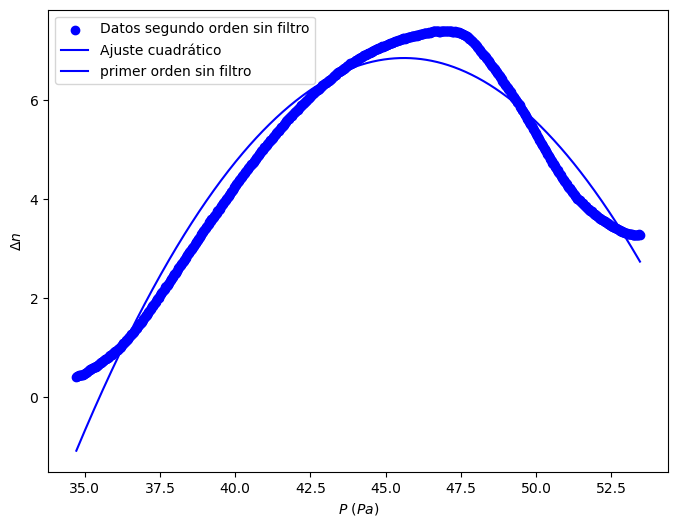

In [12]:
plt.figure(figsize=(8, 6))

#plt.errorbar(x, y, xerr=errx, yerr=erry, fmt='o', color='blue', capsize=5)  # fmt='o' para puntos

# Dibuja los puntos de datos usando scatter
plt.scatter(x, y, color='blue', label='Datos segundo orden sin filtro')

# Dibuja la línea de ajuste cuadrático
plt.plot(x, y_fit, color='blue', label='Ajuste cuadrático')

plt.plot(x, y, color='blue',label='primer orden sin filtro')
#plt.plot(x1, y1, color='red',label='primer orden con filtro')
#plt.plot(x2, y2, color='green',label='segundo orden sin filtro')


plt.ylabel(r'$\Delta n$')
plt.xlabel(r'$P$ $(Pa)$')
#plt.title('Error relativo para d=15.75cm')

plt.legend()
#plt.grid(True)  #Poner cuadrilla
#plt.savefig("H:/Escritorio/foto")  #Guardar plot en ruta
plt.show()

In [7]:
se_intercept = std_err * np.sqrt(np.sum(x**2) / len(x))
#se_intercept1 = std_err1 * np.sqrt(np.sum(x1**2) / len(x1))
#se_intercept2 = std_err2 * np.sqrt(np.sum(x2**2) / len(x2))


print(f"La ecuación de la recta es y = ({slope:.20f} ± {std_err:.20f})x + ({intercept:.9f} ± {se_intercept:.9f})")
#print(f"La ecuación de la línea es y1 = ({slope1:.20f} ± {std_err1:.20f})x + ({intercept1:.9f} ± {se_intercept1:.9f})")
#print(f"La ecuación de la línea es y2 = ({slope2:.9f} ± {std_err2:.9f})x + ({intercept2:.9f} ± {se_intercept2:.9f})")

La ecuación de la recta es y = (588137960.84848678112030029297 ± 70109855.95125927031040191650)x + (0.000625146 ± 0.001300214)


In [8]:
print(f'Coeficiente de Pearson para los datos experimentales: {pearson_coef:.5f}')
#print(f'Coeficiente de Pearson para los datos experimentales: {pearson_coef1:.5f}')
#print(f'Coeficiente de Pearson para los datos experimentales: {pearson_coef2:.5f}')


#print(f'R^2 para los datos experimentales: {r_value**2:.5f}')

Coeficiente de Pearson para los datos experimentales: 0.97934
